【ハイパーパラメタ・チューニング】<br>
これまで機械学習の手法として、SVMやランダムフォレストを使って、分類や予測をやってきましたが、<br>
実は、SVMやランダムフォレストには、ハイパーパラメータという「手動」で設定する必要がある変数があります。<br>
前にやった時は、ハイパーパラメータをデフォルト値のまま実行したことになります。<br>
今回は、また再びタイタニックを使い、このハイパーパラメータを見ていきましょう。

問1<br>
機械学習アルゴリズムのハイパーパラメータがどういう役割か、<br>また実際にSVM・ランダムフォレストの主なハイパーパラメータにどういうものがあるか、<br>またデフォルトの値が何か、調べてください。

<br>
ハイパーパラメータとは、機械学習の実行による推論や予測では決定されない、<br>
プログラム実施者が任意に決定するパラメータを言う。なお、「パラメータ」<br>
は、機械学習モデルが学習の過程で自動的に最適化を行うものを指す。
<br>
<主なハイパーパラメータ><br>
1. SVM<br>
① kernel(デフォルト:rbf - radial basis function)<br>
カーネルは、SVMの演算を行う'関数'、他に、'linear','poly'等の<br>
選択肢がある<br>
② C(コスト、デフォルト:1.0 <-実数)<br>
SVMの損失関数の誤差の係数(誤分類を許容する程度)<br>
③ gamma(γ、デフォルト:1/(特徴量の数*分散) <- 実数)<br>
kernel が 'rbf'・'poly'・'sigmoid'の際のカーネル関数の係数<br>
2. ランダムフォレスト<br>
① n_estimators(デフォルト:100-整数)<br>
ランダムフォレストは、「決定木」に設定した条件で元の集合を2分割し<br>
さらに別れた先で再度2分割する、を繰り返すが、その決定木の数<br>
② max_depth(デフォルト:None)<br>
決定木のノードの深さ(=階層)<br>
③ max_features(デフォルト:特徴量nの平方根)<br>
決定木それぞれに対し、ランダムに指定する特徴量の数。

問2<br>
1. タイタニックの'train.csv'を読み込み、予測精度に影響が少ない特徴量を外し、<br>
データを学習用:テスト用=7:3に分割し、SVMの学習モデルを作成し、予測精度を求めてください。<br>
(C,gammaの値はデフォルトで)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/AIStudy/git/exc_hyperpara_titanic

/content/drive/MyDrive/AIStudy/git/exc_hyperpara_titanic


In [5]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# カテゴリカル変数の'Sex'と'Embarked'のラベルを数値化します
df['Sex'] = df['Sex'].apply(lambda x: 0 if x=='male' else 1)
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


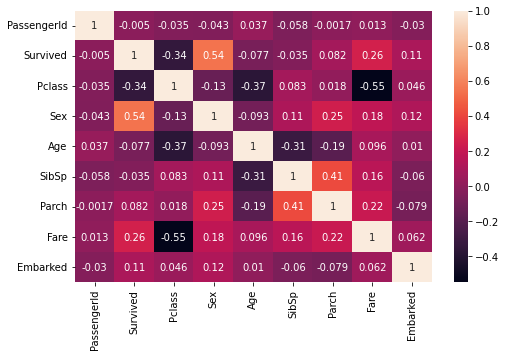

In [7]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)

In [8]:
# 'Survvied'との相関が低い'PassengerId','Age','SibSp','Parch'と
# 欠損値が多い'Ticket','Cabin'、明らかにユニークな'Name'をデータフレ
# ームから落とします
df = df.drop(['PassengerId','Age','SibSp','Parch','Ticket',
'Cabin','Name'], axis=1)
df.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,0,7.2500,0
1,1,1,1,71.2833,1
2,1,3,1,7.9250,0
3,1,1,1,53.1000,0
4,0,3,0,8.0500,0


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=0)
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [10]:
pred = clf.predict(x_test)
acc = accuracy_score(pred, y_test)
print('accuracy : {:.5f}' .format(acc))

accuracy : 0.70522


In [11]:
# ちなみに、↑の計算で使用されたハイパーパラメーターの値は次のように求められます。
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

【ハイパーパラメタ・チューニング】<br>
問2<br>
② C, gammaの値ををそれぞれ数通り組合せ、予測精度の変化を確認してください。<br>
※C(デフォルト:1.0) ∈ 実数
gamma(デフォルト:1/(特徴量の数*分散)) ∈ 実数

In [12]:
best_score = 0
for C in [0.01, 0.1, 1, 10]:
  for gamma in [0.01, 0.1, 1, 10]:
    clf = SVC(C=C, gamma=gamma)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    acc = accuracy_score(pred, y_test)
    if acc > best_score:
      best_score = acc
      best_params = {'C': C, 'gamma': gamma}

print('best score : {:.5f}' .format(best_score))
print('best parameters : {}' .format(best_params))

best score : 0.78731
best parameters : {'C': 10, 'gamma': 1}


In [13]:
# 解説
# Cの取る値を 0.01,0.1,1(デフォルト),10、gammaの取る値を0.01,0.1,1,10
# (gammaのデフォルト値は 1/(特徴量の数*分散))としました。このCとgammaの組
# 合せすべてを二重のforループで計算します(いわゆる、「しらみつぶし」というや
# つです)
# 計算させただけでは、最後に計算したもの(C=10,gamma=10)しかメモリに残らない
# ので、'accuracy_score()'の値が最も大きくなる組合せを if文で判定し、best
# _params={'C': ○,'gamma':□}というように辞書型で記録し、スコアが上回るた
# びに辞書を上書きしていきます。